In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.signal as sp
from scipy import optimize
from scipy.stats import norm

/Users/enriquecisneros/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#The data is from May 5th to May 10th
Inside_sensor = pd.read_csv("Inside STEM Room- May 5 - 10.csv")
Outside_sensor = pd.read_csv("Outside-May 5. -10.csv")
#Data for opening the door
InsideDoorTest = pd.read_csv("Inside STEM Room Door Test.csv")
OutsideDoorTest = pd.read_csv("Outside Door Test.csv")

In [3]:
Inside_sensor.head()

,Timestamp for sample frequency every 1 min,Temperature (°C),Barometric Pressure (mb)
0,2024-05-05 08:00:00,19.2150,998.73
1,2024-05-05 08:01:00,19.1850,998.67
2,2024-05-05 08:02:00,19.2300,998.75
3,2024-05-05 08:03:00,19.2175,998.77
4,2024-05-05 08:04:00,19.2050,998.75


In [4]:
Outside_sensor.head()

,Timestamp for sample frequency every 1 min,Temperature (°C),Barometric Pressure (mb)
0,2024-05-05 08:00:00,17.8925,998.67
1,2024-05-05 08:01:00,17.8800,998.66
2,2024-05-05 08:02:00,17.9025,998.63
3,2024-05-05 08:03:00,17.9025,998.70
4,2024-05-05 08:04:00,17.9050,998.69


In [5]:
#Will shorten the names to make it easier
Inside_sensor.columns = ["Timestamp (1 min)", "Temp. (C)", "Barometric Pressure (mb)"]
Outside_sensor.columns = ["Timestamp (1 min)", "Temp. (C)", "Barometric Pressure (mb)"]

In [6]:
print(Inside_sensor.shape)
print(Outside_sensor.shape)

(7886, 3)
(7886, 3)


In [7]:
Inside_sensor.describe(include = 'all')

,Timestamp (1 min),Temp. (C),Barometric Pressure (mb)
count,7886,7886.000000,7886.000000
unique,7886,NaN,NaN
top,2024-05-05 08:00:00,NaN,NaN
freq,1,NaN,NaN
mean,NaN,19.584533,999.853536
std,NaN,0.262930,1.775706
min,NaN,18.722500,995.550000
25%,NaN,19.412500,998.530000
50%,NaN,19.582500,1000.045000
75%,NaN,19.787500,1001.190000


In [8]:
Outside_sensor.describe(include = 'all')

,Timestamp (1 min),Temp. (C),Barometric Pressure (mb)
count,7886,7886.000000,7886.000000
unique,7886,NaN,NaN
top,2024-05-05 08:00:00,NaN,NaN
freq,1,NaN,NaN
mean,NaN,18.456701,999.747087
std,NaN,0.268971,1.771890
min,NaN,17.880000,995.440000
25%,NaN,18.257500,998.430000
50%,NaN,18.350000,999.945000
75%,NaN,18.617500,1001.080000


In [9]:
#The weekly average pressure inside the STEM room is 999.75 mb
#The weekly average pressure outside the STEM room is 995.85

In [10]:
x_axis = np.arange(0, len(Inside_sensor["Temp. (C)"]), 1)
print(x_axis.size)

7886


Text(0.5, 1.0, 'Temperature vs. Time Graph for the Week')

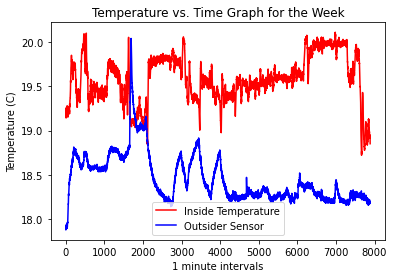

In [11]:
plt.plot(x_axis, Inside_sensor["Temp. (C)"], color = 'red', label = 'Inside Temperature')
plt.plot(x_axis, Outside_sensor["Temp. (C)"], color = 'blue', label = 'Outsider Sensor')
plt.legend()
plt.xlabel('1 minute intervals')
plt.ylabel('Temperature (C)')
plt.title('Temperature vs. Time Graph for the Week')

In [129]:
def HistPlotFunc(Inside_sensor, Outside_sensor, string, title, bins):
    fig, ax = plt.subplots(1, 2, figsize=(11, 5))
    
    # Plot histograms
    ax[0].hist(Inside_sensor[string], bins = bins, color='red', label='Inside ' + string, edgecolor='black', density=True)
    ax[1].hist(Outside_sensor[string], bins = bins, color='blue', label='Outside ' + string, edgecolor='black', density=True)
    
    # Plot Gaussian best fit lines
    InMean, InStd = norm.fit(Inside_sensor[string])
    OutMean, OutStd = norm.fit(Outside_sensor[string])
    
    xmin, xmax = ax[0].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    ax[0].plot(x, norm.pdf(x, InMean, InStd), 'black', label='Inside Gaussian Fit')
    ax[1].plot(x, norm.pdf(x, OutMean, OutStd), 'black', label='Outside Gaussian Fit')
    
    # Set labels, title, and legend
    for i in range(len(ax)):
        ax[i].set(xlabel=string, ylabel='Density', title=title)
        ax[i].legend()
    
    # Print average values
    print(f'The average {string} for the Inside and Outside Sensors are {InMean:.2f} (mb) and {OutMean:.2f} (mb)')



In [139]:
def HistPlotFunc(Inside_sensor, Outside_sensor, string, title, bins):
    fig, ax = plt.subplots(1, 2, figsize=(11, 5))
    
    # Plot histograms without normalization
    counts_inside, bins_inside, _ = ax[0].hist(Inside_sensor[string],bins = bins, color='red', label='Inside ' + string, edgecolor='black')
    counts_outside, bins_outside, _ = ax[1].hist(Outside_sensor[string], bins = bins, color='blue', label='Outside ' + string, edgecolor='black')
    
    # Plot Gaussian best fit lines
    InMean, InStd = norm.fit(Inside_sensor[string])
    OutMean, OutStd = norm.fit(Outside_sensor[string])
    
    # Generate x values for Gaussian fit lines
    x_inside = np.linspace(bins_inside[0], bins_inside[-1], 100)
    x_outside = np.linspace(bins_outside[0], bins_outside[-1], 100)
    
    # Unnormalize the Gaussian fit lines
    y_inside = norm.pdf(x_inside, InMean, InStd) * np.sum(counts_inside) * np.diff(bins_inside)[0]
    y_outside = norm.pdf(x_outside, OutMean, OutStd) * np.sum(counts_outside) * np.diff(bins_outside)[0]
    
    # Plot Gaussian fit lines
    ax[0].plot(x_inside, y_inside, 'black', label='Inside Gaussian Fit')
    ax[1].plot(x_outside, y_outside, 'black', label='Outside Gaussian Fit')
    
    # Set labels, title, and legend
    for i in range(len(ax)):
        ax[i].set(xlabel=string, ylabel='Frequency', title=title)
        ax[i].legend()
    
    # Print average values
    print(f'The average {string} for the Inside and Outside Sensors are {InMean:.2f} (mb) and {OutMean:.2f} (mb)')

The average Temp. (C) for the Inside and Outside Sensors are 19.58 (mb) and 18.46 (mb)


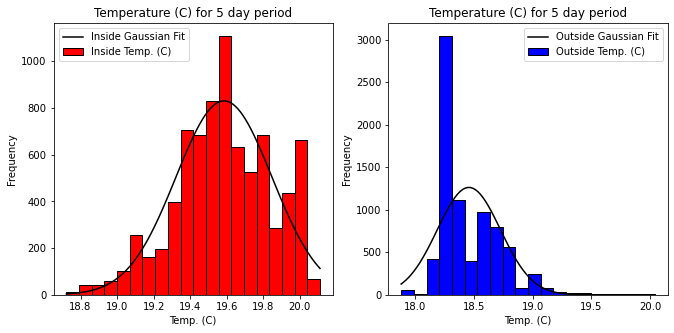

In [140]:
HistPlotFunc(Inside_sensor, Outside_sensor, 'Temp. (C)', 'Temperature (C) for 5 day period', 20)

Text(0.5, 1.0, 'Barometric Pressure vs. Time')

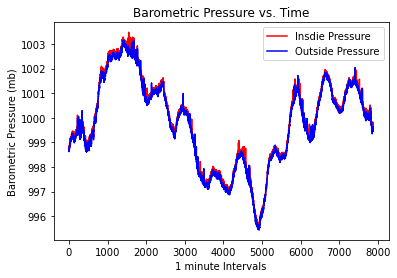

In [14]:
plt.plot(x_axis, Inside_sensor["Barometric Pressure (mb)"], color = 'red', label = 'Insdie Pressure')
plt.plot(x_axis, Outside_sensor["Barometric Pressure (mb)"], color = 'blue', label = "Outside Pressure")
plt.legend()
plt.xlabel('1 minute Intervals')
plt.ylabel('Barometric Pressure (mb)')
plt.title('Barometric Pressure vs. Time')

The average Barometric Pressure (mb) for the Inside and Outside Sensors are 999.85 (mb) and 999.75 (mb)


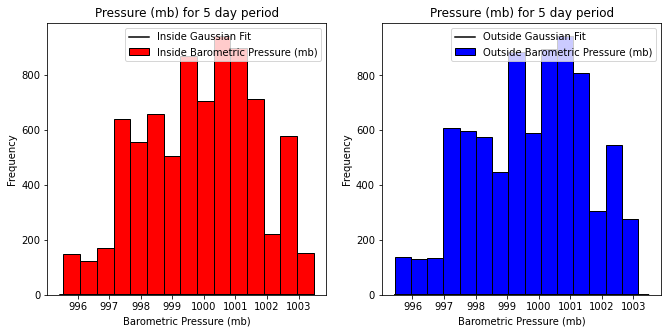

In [135]:
HistPlotFunc(Inside_sensor, Outside_sensor, 'Barometric Pressure (mb)', 'Pressure (mb) for 5 day period', 15)

In [16]:
#It looks as the data follows a gaussian curve so we can try to fit it along
def gaussian(x,amplitude, mean, stddev):
    return amplitude * np.exp(-(x - mean)**2 / (2 * stddev**2))

<AxesSubplot:xlabel='Barometric Pressure (mb)', ylabel='Count'>

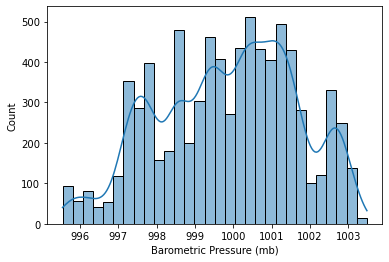

In [17]:
sns.histplot(data = Inside_sensor, x = 'Barometric Pressure (mb)', kde = True)

In [18]:
#Next step is to see how the extrenums of the pressure
Inside_max = np.max(Inside_sensor["Barometric Pressure (mb)"])
Outside_max = np.max(Outside_sensor['Barometric Pressure (mb)'])

Inside_min = np.min(Inside_sensor['Barometric Pressure (mb)'])
Outside_min = np.min(Outside_sensor['Barometric Pressure (mb)'])
print(f'The maximum pressure achieved Inside and Outside respectively are {Inside_max} (mb) and {Outside_max} (mb)')
print(f'The minimum pressure achieved Inside and Outside respectively are {Inside_min} (mb) and {Outside_min} (mb)')

The maximum pressure achieved Inside and Outside respectively are 1003.48 (mb) and 1003.15 (mb)
The minimum pressure achieved Inside and Outside respectively are 995.55 (mb) and 995.44 (mb)


In [19]:
#Then figure out the corresponding values to see if when Inside pressure is at maximum is the outside one at max
#as well, etc. Will index out new sections
True_values = Inside_sensor[Inside_sensor['Timestamp (1 min)'] == Outside_sensor['Timestamp (1 min)']]
False_values = Inside_sensor[Inside_sensor['Timestamp (1 min)'] != Outside_sensor['Timestamp (1 min)']]
print(True_values.size, False_values.size)
#This is to see if the ordering of data is matching, we see that the data is aligned and they match.

23658 0


In [20]:
InsideMaxData = Inside_sensor[Inside_sensor["Barometric Pressure (mb)"] == Inside_max]
InsideMaxData

,Timestamp (1 min),Temp. (C),Barometric Pressure (mb)
1549,2024-05-06 09:49:00,19.3575,1003.48


In [21]:
Outside_sensor.iloc[1549]
#The inside sensor reaches its maximum barometric pressure of 1003.48 with the corresponding outside pressure of 
#1002.77

Timestamp (1 min)           2024-05-06 09:49:00
Temp. (C)                                  18.7
Barometric Pressure (mb)                1002.77
Name: 1549, dtype: object

In [22]:
OutsideMaxData = Outside_sensor[Outside_sensor["Barometric Pressure (mb)"] == Outside_max]
OutsideMaxData

,Timestamp (1 min),Temp. (C),Barometric Pressure (mb)
1400,2024-05-06 07:20:00,18.7075,1003.15


In [23]:
Inside_sensor.iloc[1400]
#When the pressure reached its maximum on the outside of 1003.15, the corresponding inside pressure was 1003.28

Timestamp (1 min)           2024-05-06 07:20:00
Temp. (C)                               19.5425
Barometric Pressure (mb)                1003.28
Name: 1400, dtype: object

In [24]:
#Now to see how the temperature changes throught a 24 hour period. Will use data from May 8th because only one user
#throughout the day from 9 am - 12 pm
Outside24 = Outside_sensor[('2024-05-08 00:00:00' < Outside_sensor["Timestamp (1 min)"]) & (Outside_sensor["Timestamp (1 min)"] < '2024-05-08 23:59:00')]

In [25]:
Outside24.describe(include = 'all')

,Timestamp (1 min),Temp. (C),Barometric Pressure (mb)
count,1438,1438.000000,1438.000000
unique,1438,NaN,NaN
top,2024-05-08 00:01:00,NaN,NaN
freq,1,NaN,NaN
mean,NaN,18.338420,997.305289
std,NaN,0.134218,0.852714
min,NaN,18.197500,995.440000
25%,NaN,18.255000,996.910000
50%,NaN,18.285000,997.330000
75%,NaN,18.345000,997.990000


In [26]:
Inside24 = Inside_sensor[('2024-05-08 00:00:00' < Inside_sensor["Timestamp (1 min)"]) & (Inside_sensor["Timestamp (1 min)"] < '2024-05-08 23:59:00')]

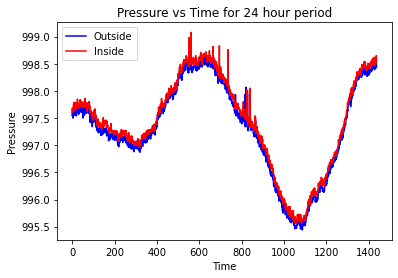

In [27]:
axis24 = np.arange(0, len(Outside24["Barometric Pressure (mb)"]), 1)
plt.plot(axis24, Outside24["Barometric Pressure (mb)"], label = 'Outside', color = 'blue')
plt.plot(axis24, Inside24["Barometric Pressure (mb)"], label = 'Inside', color = 'red')
plt.xlabel("Time")
plt.ylabel("Pressure")
plt.title('Pressure vs Time for 24 hour period')
plt.legend()

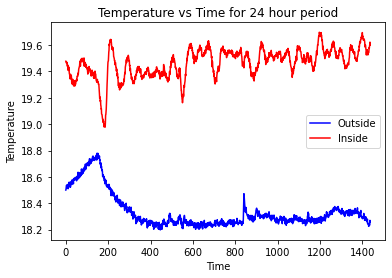

In [28]:
plt.plot(axis24, Outside24["Temp. (C)"], label = 'Outside', color = 'Blue')
plt.plot(axis24, Inside24["Temp. (C)"], label = 'Inside', color = 'red')
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title('Temperature vs Time for 24 hour period')
plt.legend()

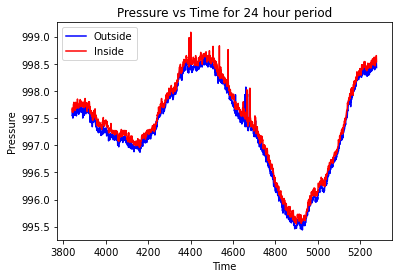

In [29]:
#Looking at the data we see that pressure does not vary much between the inside and the outside. The pressure tends
#to stay relatively the same, with the inside pressure being higher than the outside due to the hotter temperatures
plt.plot(Outside24["Barometric Pressure (mb)"], label = 'Outside', color = 'blue')
plt.plot(Inside24["Barometric Pressure (mb)"], label = 'Inside', color = 'red')
plt.xlabel("Time")
plt.ylabel("Pressure")
plt.title('Pressure vs Time for 24 hour period')
plt.legend()

The average Barometric Pressure (mb) for the Inside and Outside Sensors are 997.41 (mb) and 997.31 (mb)


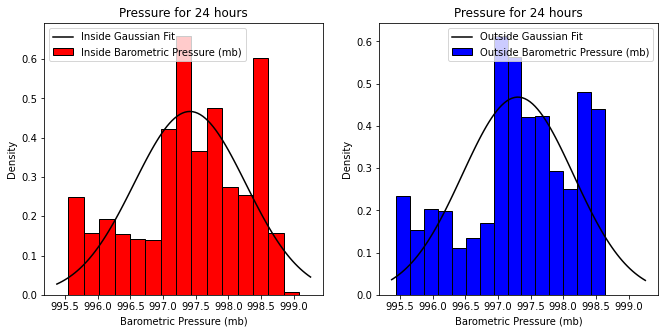

In [124]:
HistPlotFunc(Inside24, Outside24, 'Barometric Pressure (mb)', 'Pressure for 24 hours', 15)

The average Temp. (C) for the Inside and Outside Sensors are 19.46 (mb) and 18.34 (mb)


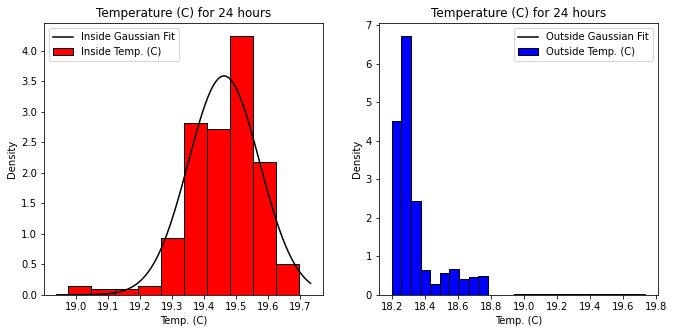

In [31]:
HistPlotFunc(Inside24, Outside24, 'Temp. (C)', 'Temperature (C) for 24 hours')

In [32]:
#Get the average temperature within a 24 hour period.
mean = Outside24['Barometric Pressure (mb)'].mean()
print('Average pressure in a day is: ' + str(mean))
#Next step is to see how the temperature deviates from the average throughout the day
variance = Outside24['Barometric Pressure (mb)'].var()
print('The variance in the data is: ' + str(variance))

Average pressure in a day is: 997.305288803893
The variance in the data is: 0.7271203921570942


In [33]:
#Creating a function that calculate the average rate of change of the pressure as a function of time in 1 min intervals

def RateofChange(data):
    '''We are trying to find the rate of change of pressure with respect to time 
       Data will be the pressure values, do not need an xaxis values as it evenly spread intervals
    '''
    data = np.array(data) #pressure values
    #Must find dPdT which is the rate of change for the pressure
    dPdT = []
    for i in range(len(data) - 1):
        dPdT.append((data[i + 1] - data[i]))
    values = [np.mean(dPdT), dPdT]
    return values

In [34]:
InsideROC = RateofChange(Inside24['Barometric Pressure (mb)'])
print(InsideROC[0])
OutsideROC = RateofChange(Outside24['Barometric Pressure (mb)'])
print(OutsideROC[0])
#The average rate of change for the pressure in one day is 0.0006 mb for both inside and outside


0.000598469032707038
0.0005775922059846396


In [35]:
#We have an average value in an interval of time and look at the deviation of error within that time.
#Only the error should be gaussian
#Want to know the fluctions around the average are in the interval of time. 


In [36]:
InsideDoorTest.columns = ['Timestamp (1min)', 'Temp. (C)', 'Barometric Pressure (mb)']
OutsideDoorTest.columns = ['Timestamp (1min)', 'Temp. (C)', 'Barometric Pressure (mb)']

In [37]:
InsideDoorTest.describe(include = 'all')

,Timestamp (1min),Temp. (C),Barometric Pressure (mb)
count,38,38.000000,38.000000
unique,38,NaN,NaN
top,2024-05-13 19:59:00,NaN,NaN
freq,1,NaN,NaN
mean,NaN,19.494145,1000.117884
std,NaN,0.034958,0.169970
min,NaN,19.445000,999.970000
25%,NaN,19.467500,1000.040000
50%,NaN,19.478750,1000.060000
75%,NaN,19.523125,1000.127500


In [38]:
OutsideDoorTest.describe(include = 'all')

,Timestamp (1min),Temp. (C),Barometric Pressure (mb)
count,38,38.000000,38.000000
unique,38,NaN,NaN
top,2024-05-13 19:59:00,NaN,NaN
freq,1,NaN,NaN
mean,NaN,18.242303,1000.036579
std,NaN,0.054570,0.192161
min,NaN,18.147500,999.840000
25%,NaN,18.193750,999.930000
50%,NaN,18.250000,999.965000
75%,NaN,18.285000,1000.057500


In [39]:
print(InsideDoorTest.head())
print(InsideDoorTest.tail())

      Timestamp (1min)  Temp. (C)  Barometric Pressure (mb)
0  2024-05-13 19:59:00    19.5475                  999.9700
1  2024-05-13 20:00:00    19.5300                 1000.0400
2  2024-05-13 20:01:00    19.5450                 1000.0300
3  2024-05-13 20:02:00    19.5275                 1000.0099
4  2024-05-13 20:03:00    19.5625                 1000.0500
       Timestamp (1min)  Temp. (C)  Barometric Pressure (mb)
33  2024-05-13 20:32:00    19.4775                   1000.75
34  2024-05-13 20:33:00    19.5150                   1000.11
35  2024-05-13 20:34:00    19.5250                   1000.23
36  2024-05-13 20:35:00    19.5175                   1000.20
37  2024-05-13 20:36:00    19.5425                   1000.16


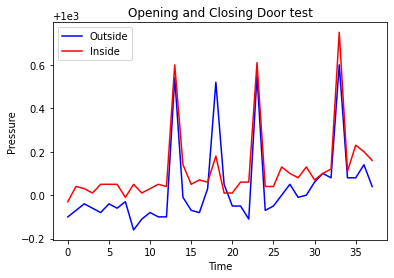

In [40]:
plt.plot(OutsideDoorTest["Barometric Pressure (mb)"], label = 'Outside', color = 'blue')
plt.plot(InsideDoorTest["Barometric Pressure (mb)"], label = 'Inside', color = 'red')
plt.xlabel("Time")
plt.ylabel("Pressure")
plt.title('Opening and Closing Door test')
plt.legend()

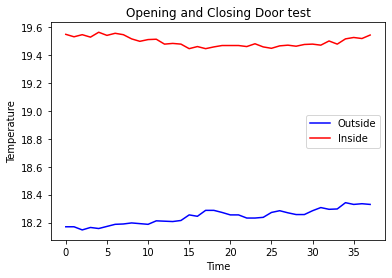

In [41]:
plt.plot(OutsideDoorTest["Temp. (C)"], label = 'Outside', color = 'blue')
plt.plot(InsideDoorTest["Temp. (C)"], label = 'Inside', color = 'red')
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title('Opening and Closing Door test')
plt.legend()

The average Barometric Pressure (mb) for the Inside and Outside Sensors are 1000.12 (mb) and 1000.04 (mb)


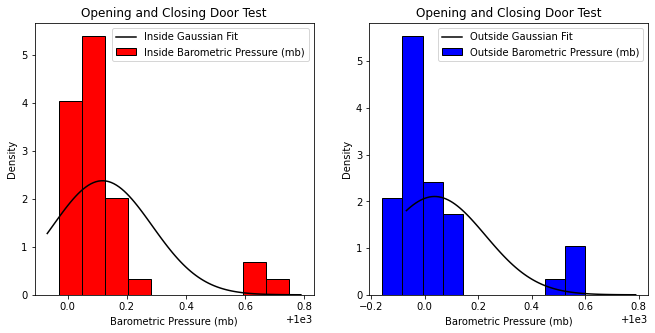

In [42]:
HistPlotFunc(InsideDoorTest, OutsideDoorTest, 'Barometric Pressure (mb)', 'Opening and Closing Door Test')

In [43]:
#These are the average rate of change of pressure
RateOfChangeIn = RateofChange(InsideDoorTest['Barometric Pressure (mb)'])
print(RateOfChangeIn[0])
RateOfChangeOut = RateofChange(OutsideDoorTest['Barometric Pressure (mb)'])
print(RateOfChangeOut[0])

0.005135135135133537
0.003783783783783415


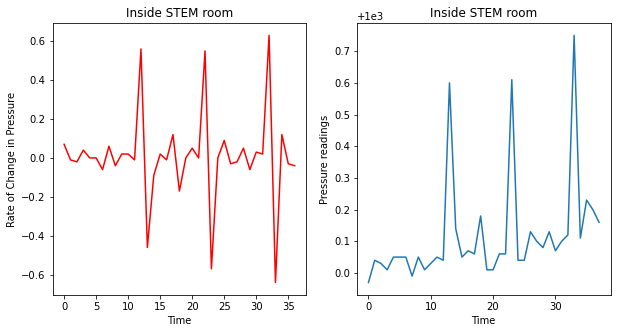

In [44]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))

ax[0].plot(RateOfChangeIn[1], color = 'red')
ax[0].set(xlabel = 'Time',
         ylabel = 'Rate of Change in Pressure',
         label = 'Rate of Change')
ax[1].plot(InsideDoorTest['Barometric Pressure (mb)'] )
ax[1].set(xlabel = 'Time',
         ylabel = 'Pressure readings',
         label = 'Pressure Readings')
for i in range(len(ax)):
    ax[i].set(title = 'Inside STEM room')

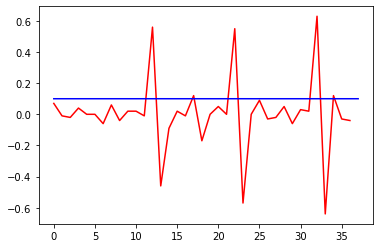

In [45]:
plt.plot(RateOfChangeIn[1], color = 'red', label = 'Rate of Change')
plt.plot(InsideDoorTest['Barometric Pressure (mb)'] * 1e-4 , color = 'blue')

In [46]:
#Each peak is the rate of change, so it means by how much the pressure changed per minute:
#Find the peaks of each point to determine the rate of change at that specific point in time
def peak_vals(RateOfChangeData):
    peak_index, peak_value = sp.find_peaks(RateOfChangeData[1])
    peak_val = []
    for i in peak_index:
        peak_val.append(RateOfChangeData[1][i])
            
    return peak_index, peak_val
InsidePeaks = peak_vals(RateOfChangeIn)

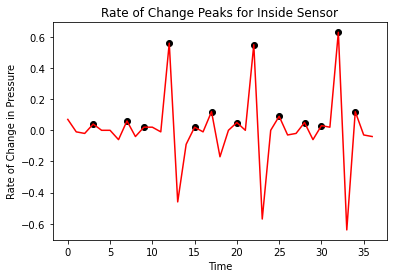

In [47]:
plt.plot(RateOfChangeIn[1], color = 'red', label = 'Rate of Change Graph')
plt.title('Rate of Change Peaks for Inside Sensor')
plt.xlabel('Time')
plt.ylabel('Rate of Change in Pressure')
plt.scatter(InsidePeaks[0],InsidePeaks[1], color = 'black')

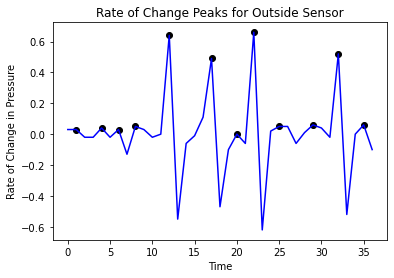

In [48]:
OutsidePeaks = peak_vals(RateOfChangeOut)
plt.plot(RateOfChangeOut[1], color = 'blue', label = 'Rate of Change Graph')
plt.title('Rate of Change Peaks for Outside Sensor')
plt.xlabel('Time')
plt.ylabel('Rate of Change in Pressure')

plt.scatter(OutsidePeaks[0], OutsidePeaks[1], color = 'black')

In [49]:
#The times that the door was open:
#Start at 8:00PM and then it was opened every 5 minutes. Data was recorded in intervals of 1 min
#8:05 - 8:06 
#8:10 - 8:11
#8:15 - 8:16
#8:20 - 8:21
#8:25 - 8:26
#8:30 - 8:31
#8:35 - 8:36 - Last Data point recorded
#Since the data was taken starting at 

#The very first data point was taken at 7:59 PM and the last was taken at 8:36 PM
#Looking at the peaks, it is relatively a minute before that time the door was opened. Add one to each peak value 
#because the data starts at 7:59

In [50]:
TopPeakIn = np.array(InsidePeaks[1])

# Get the indices that would sort the peak values array in descending order
SortedIn = np.argsort(TopPeakIn)[::-1]

# Sort the peak indices and values arrays using take_along_axis
SortedPeakIn = np.take_along_axis(InsidePeaks[0], SortedIn, axis=0)
SortedValIn = np.take_along_axis(TopPeakIn, SortedIn, axis=0)

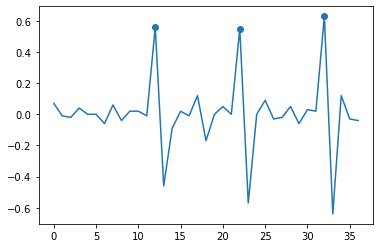

In [51]:
plt.plot(RateOfChangeIn[1])
plt.scatter(SortedPeakIn[0:3], SortedValIn[0:3])

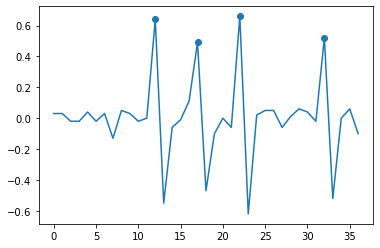

In [52]:
TopPeakOut = np.array(OutsidePeaks[1])

# Get the indices that would sort the peak values array in descending order
SortedOut = np.argsort(TopPeakOut)[::-1]

# Sort the peak indices and values arrays using take_along_axis
SortedPeakOut = np.take_along_axis(OutsidePeaks[0], SortedOut, axis=0)
SortedValOut = np.take_along_axis(TopPeakOut, SortedOut, axis=0)

plt.plot(RateOfChangeOut[1])
plt.scatter(SortedPeakOut[0:4], SortedValOut[0:4])

In [53]:
def QuadPlotP(RateOfChangeIn, RateOfChangeOut, InsidePeaks, OutsidePeaks, InsideData, OutsideData):
    fig, ax = plt.subplots(2,2, figsize = (8,8))
    plt.subplots_adjust(hspace=0.5, wspace=0.5)

    ax[0,0].plot(RateOfChangeIn[1], color = 'red')
    ax[0,0].scatter(InsidePeaks[0], InsidePeaks[1], color = 'black')
    ax[0,0].set(xlabel = 'Time',
             ylabel = 'Rate of Change in Pressure',
             label = 'Rate of Change',
               title = 'Rate of Change Inside')
    ax[0,1].plot(InsideData['Barometric Pressure (mb)'], color = 'blue')
    ax[0,1].set(xlabel = 'Time',
             ylabel = 'Pressure readings',
             label = 'Pressure Readings Outside',
               title = 'Pressure readings (mb)')
    ax[1,0].plot(RateOfChangeOut[1], color = 'red')
    ax[1,0].scatter(OutsidePeaks[0], OutsidePeaks[1], color = 'black')
    ax[1,0].set(xlabel = 'Time',
             ylabel = 'Rate of Change in Pressure',
             label = 'Rate of Change Inside',
           title = "Rate of Change Outside")
    ax[1,1].plot(OutsideData['Barometric Pressure (mb)'], color = 'blue')
    ax[1,1].set(xlabel = 'Time',
             ylabel = 'Pressure readings',
             label = 'Pressure Readings Inside',
               title = 'Pressure Readings Outside')

    for i in range(len(ax)):
        for j in range(len(ax)):
            ax[i,j].legend()
    plt.tight_layout()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


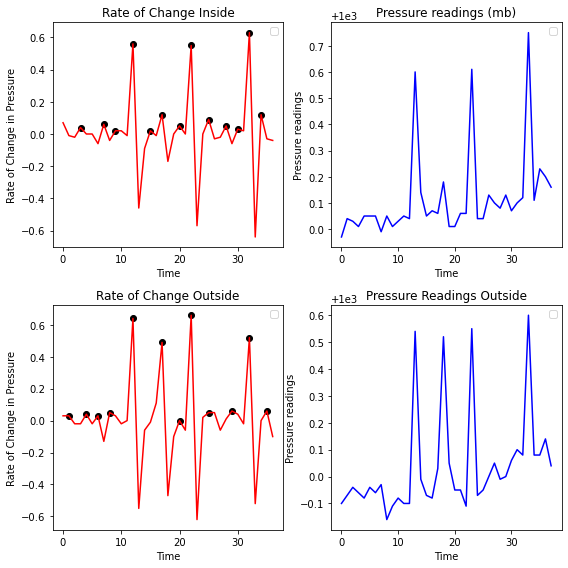

In [54]:
QuadPlotP(RateOfChangeIn, RateOfChangeOut, InsidePeaks, OutsidePeaks, InsideDoorTest, OutsideDoorTest)

In [55]:
print(RateOfChangeIn[0])
print(RateOfChangeOut[0])

0.005135135135133537
0.003783783783783415


In [56]:
def HistPlotFunc2(Inside_sensor, Outside_sensor, title):
    fig, ax = plt.subplots(1, 2, figsize=(11, 5))
    
    # Plot histograms
    ax[0].hist(Inside_sensor[1], color='red', label='Inside ', edgecolor='black', density=True)
    ax[1].hist(Outside_sensor[1], color='blue', label='Outside ', edgecolor='black', density=True)
    
    # Plot Gaussian best fit lines
    InMean, InStd = norm.fit(Inside_sensor[1])
    OutMean, OutStd = norm.fit(Outside_sensor[1])
    
    xmin, xmax = ax[0].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    ax[0].plot(x, norm.pdf(x, InMean, InStd), 'black', label='Inside Gaussian Fit')
    ax[1].plot(x, norm.pdf(x, OutMean, OutStd), 'black', label='Outside Gaussian Fit')
    
    # Set labels, title, and legend
    for i in range(len(ax)):
        ax[i].set(xlabel='Rate of Change', ylabel='Density', title=title)
        ax[i].legend()

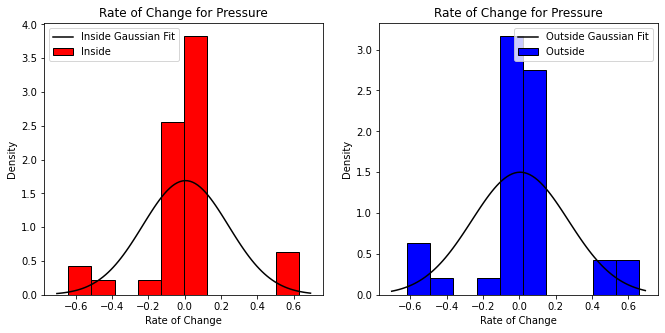

In [57]:
HistPlotFunc2(RateOfChangeIn, RateOfChangeOut, "Rate of Change for Pressure")

In [58]:
RateOfChangeInT = RateofChange(InsideDoorTest['Temp. (C)'])
RateOfChangeOutT = RateofChange(OutsideDoorTest['Temp. (C)'])

PeakInT = peak_vals(RateOfChangeInT)
PeakOutT = peak_vals(RateOfChangeOutT)

print(RateOfChangeInT[0])
print(RateOfChangeOutT[0])

-0.00013513513513510825
0.0043243243243242325


[Text(0.5, 0, 'Time'),
 Text(0, 0.5, 'Temperature readings'),
 None,
 Text(0.5, 1.0, 'Temperature Readings Outside')]

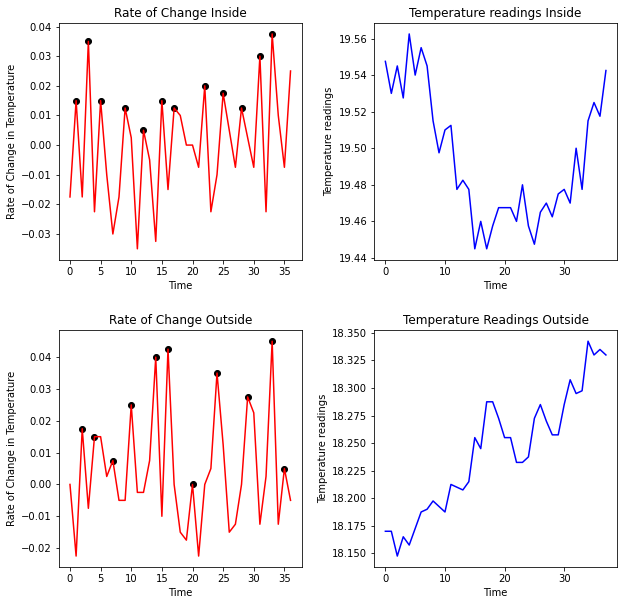

In [86]:
fig, ax = plt.subplots(2,2, figsize = (10,10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

ax[0,0].plot(RateOfChangeInT[1], color = 'red')
ax[0,0].scatter(PeakInT[0], PeakInT[1], color = 'black')
ax[0,0].set(xlabel = 'Time',
         ylabel = 'Rate of Change in Temperature',
         label = 'Rate of Change',
           title = 'Rate of Change Inside')

ax[0,1].plot(InsideDoorTest['Temp. (C)'], color = 'blue')
ax[0,1].set(xlabel = 'Time',
         ylabel = 'Temperature readings',
         label = 'Temperature Readings Outside',
           title = 'Temperature readings Inside')

ax[1,0].plot(RateOfChangeOutT[1], color = 'red')
ax[1,0].scatter(PeakOutT[0], PeakOutT[1], color = 'black')
ax[1,0].set(xlabel = 'Time',
         ylabel = 'Rate of Change in Temperature',
         label = 'Rate of Change Inside',
           title = "Rate of Change Outside")

ax[1,1].plot(OutsideDoorTest['Temp. (C)'], color = 'blue')
ax[1,1].set(xlabel = 'Time',
         ylabel = 'Temperature readings',
         label = 'Temperature Readings Inside',
           title = 'Temperature Readings Outside')



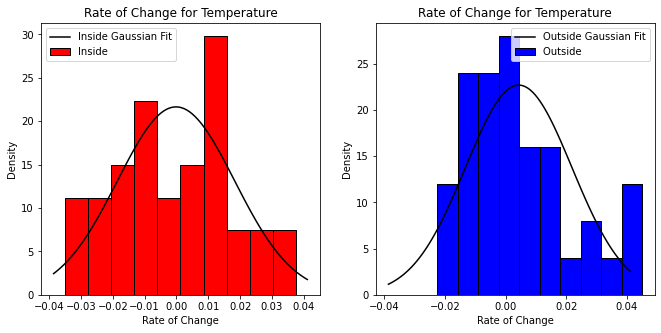

In [60]:
HistPlotFunc2(RateOfChangeInT, RateOfChangeOutT, "Rate of Change for Temperature")

In [61]:
#Values:
#Rate of Change/deltaP for Inside sensor is 0.00513 with an average pressure of 1000.117884
#Rate of Change/deltaP for Outside sensor is 0.0037 with an average pressure of 1000.036579
#Looking at the data, the door does affect the pressure of the rooms inside. The big peaks can potentially be 
#from holding the door open longer than other times, allowing the pressure to equalize better.

#Notes for Tristan:
#If possible double check my code on how I got the rate of change in pressure and if the average delat p is correct
#as well. That is the main concern

In [62]:
#Get the FFT of the pressures vs frequencies
print(Inside_sensor.size)
print(Outside_sensor.size)

23658
23658


In [68]:
#Do the rate of change for the temperature
ROChangeWeekPIn = RateofChange(Inside_sensor['Barometric Pressure (mb)'])
ROChangeWeekPOut = RateofChange(Outside_sensor['Barometric Pressure (mb)'])

PeakInWeekP = peak_vals(ROChangeWeekPIn)
PeakOutWeekP = peak_vals(ROChangeWeekPOut)

print(ROChangeWeekPIn[0])
print(ROChangeWeekPOut[0])



0.00013696892834494956
0.00011160431198478066


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


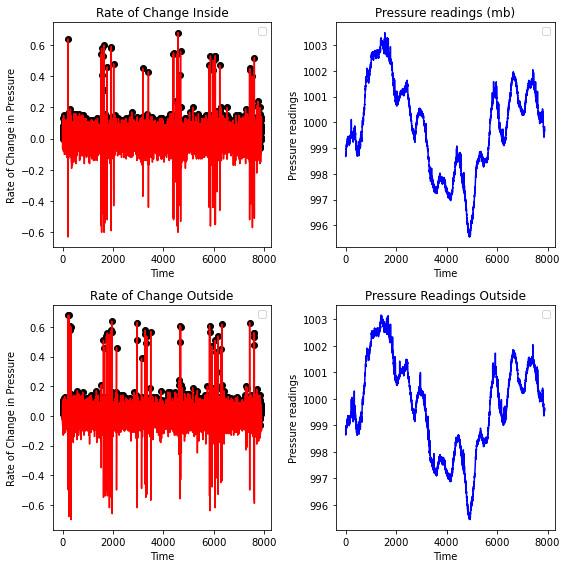

In [69]:
QuadPlotP(ROChangeWeekPIn, ROChangeWeekPOut, PeakInWeekP, PeakOutWeekP, Inside_sensor, Outside_sensor)

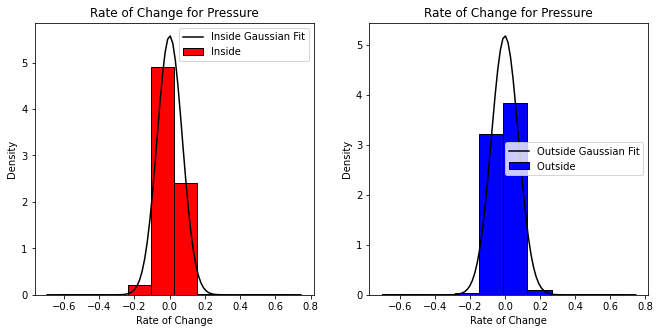

In [70]:
HistPlotFunc2(ROChangeWeekPIn, ROChangeWeekPOut, "Rate of Change for Pressure")

In [71]:
ROChangeWeekTIn = RateofChange(Inside_sensor['Temp. (C)'])
ROChangeWeekTOut = RateofChange(Outside_sensor['Temp. (C)'])

PeakInWeekT = peak_vals(ROChangeWeekTIn)
PeakOutWeekT = peak_vals(ROChangeWeekTOut)

print(ROChangeWeekTIn[0])
print(ROChangeWeekTOut[0])


-4.597336715282191e-05
3.741280913126211e-05


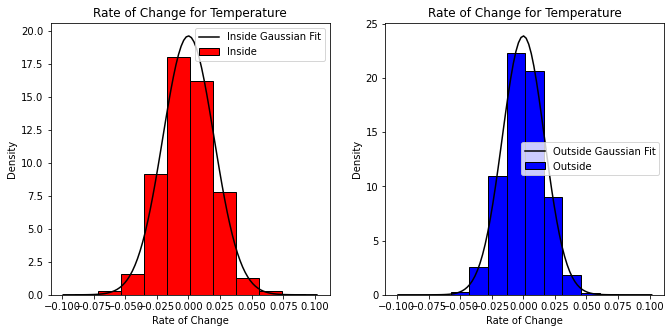

In [72]:
HistPlotFunc2(ROChangeWeekTIn, ROChangeWeekTOut, "Rate of Change for Temperature")

In [118]:
#Now lookig for the FFT of pressure
FFTInside = np.fft.rfft(Inside_sensor['Barometric Pressure (mb)'])
print(FFTInside.size)
signalsizeI = FFTInside.size
sample_rate = 1/60

InFreqList = np.fft.rfftfreq(signalsizeI, sample_rate)

print(InFreqList.size)

3944
1973


/Users/enriquecisneros/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


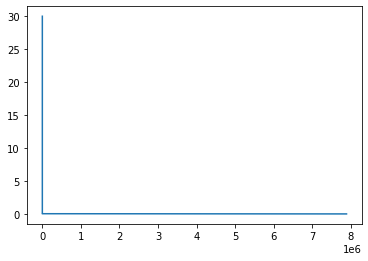

In [112]:
plt.plot(FFTInside[0:len(InFreqList)], InFreqList)

/Users/enriquecisneros/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


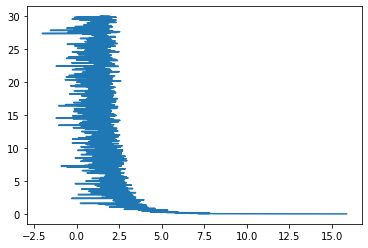

In [113]:
plt.plot(np.log(FFTInside[0:len(InFreqList)]), InFreqList)

/Users/enriquecisneros/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


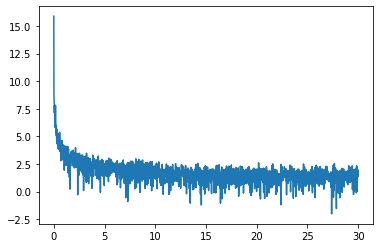

In [114]:
plt.plot(InFreqList, np.log(FFTInside[0:len(InFreqList)]))